Figure out how to read SDSS spectra from GAMA DR2 found in http://www.gama-survey.org/dr2/data/spectra/sdss/ . This is part of an ongoing effort in order to figure out the discrepancy between SDSS and GAMA emission line flux measurements

In [1]:
import numpy as np
from astropy.io import fits
# -- local -- 
from feasibgs import util as UT
from feasibgs import catalogs as Cat

In [2]:
import matplotlib as mpl 
import matplotlib.pyplot as pl 
mpl.rcParams['text.usetex'] = True
mpl.rcParams['font.family'] = 'serif'
mpl.rcParams['axes.linewidth'] = 1.5
mpl.rcParams['axes.xmargin'] = 1
mpl.rcParams['xtick.labelsize'] = 'x-large'
mpl.rcParams['xtick.major.size'] = 5
mpl.rcParams['xtick.major.width'] = 1.5
mpl.rcParams['ytick.labelsize'] = 'x-large'
mpl.rcParams['ytick.major.size'] = 5
mpl.rcParams['ytick.major.width'] = 1.5
mpl.rcParams['legend.frameon'] = False
%matplotlib inline

Read in one example spectra downloaded from the GAMA server. File format are described in http://das.sdss.org/www/html/dm/flatFiles/spSpec.html

In [3]:
fgama = fits.open('spSpec-51609-0304-012.fit')

In [4]:
fsdss = fits.open('spec-0304-51609-0012.fits')

In [5]:
fgama0 = fgama[0]

In [6]:
wave_gama = np.logspace(fgama0.header['COEFF0'], 
                     fgama0.header['COEFF0']+fgama0.header['COEFF1']*len(fgama0.data[0,:]), 
                     len(fgama0.data[0,:]))
flux_gama = fgama0.data[0,:]

(0.0, 30.0)

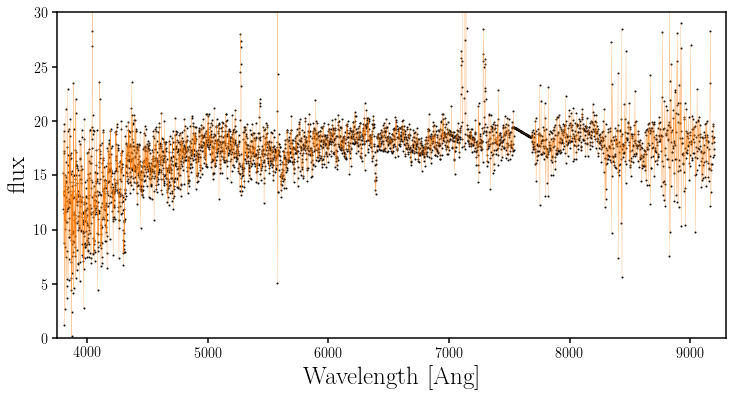

In [7]:
fig = plt.figure(figsize=(12,6))
sub = fig.add_subplot(111)
sub.scatter(10**fsdss[1].data.field('loglam'), fsdss[1].data.field('flux'), c='k', s=1)
sub.plot(wave_gama, flux_gama, c='C1', lw=0.2)
sub.set_xlabel('Wavelength [Ang]', fontsize=25)
sub.set_xlim([3750, 9300.])
sub.set_ylabel('flux', fontsize=25)
sub.set_ylim([0., 30.])

(10.0, 30.0)

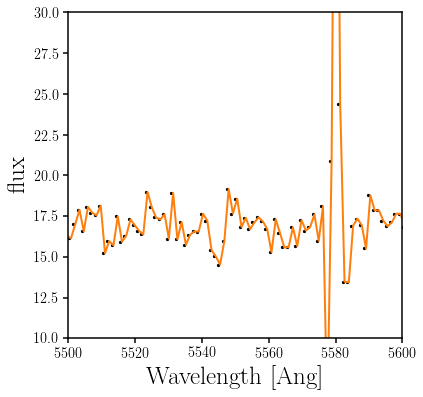

In [8]:
fig = plt.figure(figsize=(6,6))
sub = fig.add_subplot(111)
sub.scatter(10**fsdss[1].data.field('loglam'), fsdss[1].data.field('flux'), c='k', s=5)
sub.plot(wave_gama, flux_gama, c='C1', lw=2)
sub.set_xlabel('Wavelength [Ang]', fontsize=25)
sub.set_xlim([5500, 5600.])
sub.set_ylabel('flux', fontsize=25)
sub.set_ylim([10., 30.])

The SDSS spectra from GAMA and the corresponding spectra downloaded directly from SDSS correspond perfectly. 

Now I'll blah

In [9]:
cata = Cat.GamaLegacy()
gleg = cata.Read()
cataid = gleg['gama-photo']['cataid']
print('%i galaxies in GAMA-Legacy catalog' % len(cataid))

39832 galaxies in GAMA-Legacy catalog


In [11]:
f_ext_spec = fits.open(UT.dat_dir()+'gama/ExternalSpecAll.fits')
ext_spec = f_ext_spec[1].data

In [12]:
ext_spec_cataid = ext_spec['cataid']

In [15]:
print np.sum(ext_spec['survey'] == 'SDSS')

16267


In [22]:
m_gleg = np.zeros(len(cataid), dtype=bool)
joint_cataid, m_ext_spec = [], [] 
for ii, cid in enumerate(ext_spec['cataid'][ext_spec['survey'] == 'SDSS']): 
    if cid in cataid: 
        joint_cataid.append(cid)
        m_ext_spec.append(ii)
        m_gleg[cataid == cid] = True
m_ext_spec = np.array(m_ext_spec)

In [24]:
print len(np.unique(joint_cataid)), np.sum(m_gleg)

186 186


In [26]:
plates, mjds, fiberids = [], [], [] 
for m in m_ext_spec: 
    plates.append(int(ext_spec['filename'][m].split('-')[-1].split('.')[0]))
    mjds.append(int(ext_spec['filename'][m].split('-')[1]))
    fiberids.append(int(ext_spec['filename'][m].split('-')[2]))

In [33]:
np.savetxt(UT.dat_dir()+'sdss/gleg_sdss_matches.txt', 
           np.array([np.array(plates), np.array(mjds), np.array(fiberids)]).T, 
           delimiter=',', fmt='%i')